In [13]:
from scripts.preprocess import Preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
columns = ['asbp_med', 'adbp_med', 'agluc_med', 'Aglucose', 'ams_gluc', 'ams_hpt', 'adiabe01']
filename = '../data/nesda.csv'

Preprocessing.perform_imputation(columns, filename)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputed data saved as '../data/nesda_imputed.csv'.


## Visualizing data distribution after imputation

In [19]:
imputed_df = pd.read_csv('../data/nesda_imputed.csv')
original_df = pd.read_csv('../data/nesda.csv')

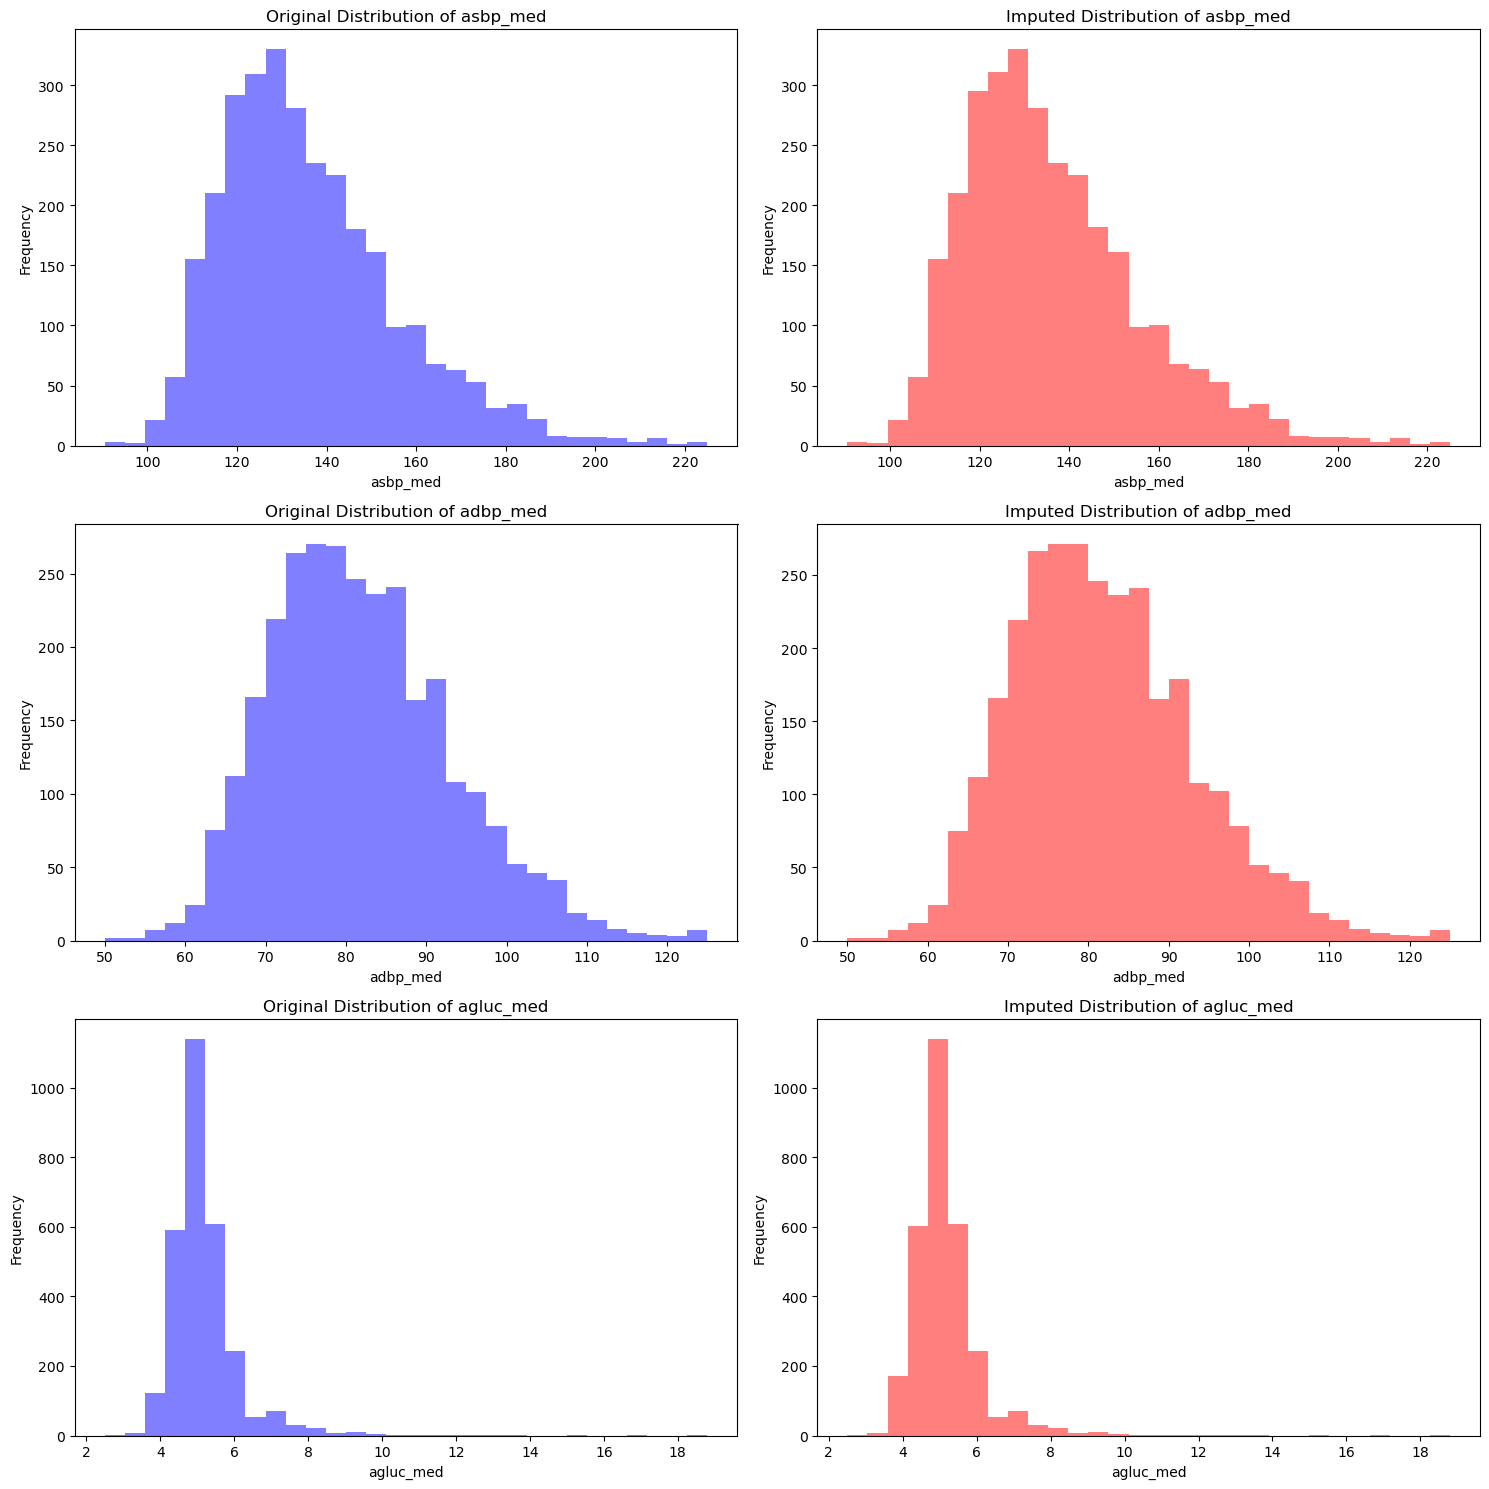

In [26]:
imputed_cols = ['asbp_med', 'adbp_med', 'agluc_med']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15)) 
axes = axes.flatten()

for i, col in enumerate(imputed_cols):
    # original data distribution
    ax = axes[2*i]
    original_df[col].dropna().plot(kind='hist', bins=30, ax=ax, color='blue', alpha=0.5, label='Original')
    ax.set_title(f'Original Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

    # imputed data distribution
    ax = axes[2*i + 1]
    imputed_df[col].plot(kind='hist', bins=30, ax=ax, color='red', alpha=0.5, label='Imputed')
    ax.set_title(f'Imputed Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

for j in range(2*i + 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [23]:
imputed_df[imputed_cols].describe()

,asbp_med,adbp_med,agluc_med
count,2981.000000,2981.000000,2981.000000
mean,136.124322,81.599104,5.173185
std,19.705325,11.185020,0.997750
min,90.500000,50.000000,2.500000
25%,122.000000,73.500000,4.600000
50%,132.500000,80.500000,5.000000
75%,147.000000,88.500000,5.500000
max,225.000000,125.000000,18.800000
